In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
N=1000000
data=pd.read_csv("gear_dataset.csv", nrows=N, header=None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
0     1000000 non-null float64
1     1000000 non-null object
2     1000000 non-null int64
3     1000000 non-null object
4     1000000 non-null object
5     1000000 non-null object
6     991371 non-null object
7     991371 non-null object
8     991371 non-null object
9     991371 non-null object
10    991371 non-null object
11    991371 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 91.6+ MB


In [4]:
# rename the columns
columns = ['timestamp', 'canID', 'dlc', 'data0', 'data1', 'data2',
          'data3', 'data4', 'data5', 'data6', 'data7', 'flag']
data.columns = columns

In [5]:
# convert the timestamp column
# define a function that will convert column 0 to timestamp
def toDateType(x):
    return dt.datetime.fromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S.%f')

In [6]:
data['timestamp'] = data.timestamp.apply(toDateType)

# convert it to a datetime object
data['timestamp'] = pd.to_datetime(data.timestamp)

In [7]:
data.head()

,timestamp,canID,dlc,data0,data1,data2,data3,data4,data5,data6,data7,flag
0,2016-11-03 13:13:10.056566,0140,8,00,00,00,00,10,29,2a,24,R
1,2016-11-03 13:13:10.056817,02c0,8,15,00,00,00,00,00,00,00,R
2,2016-11-03 13:13:10.057058,0350,8,05,20,44,68,77,00,00,7e,R
3,2016-11-03 13:13:10.057304,0370,8,00,20,00,00,00,00,00,00,R
4,2016-11-03 13:13:10.057542,043f,8,10,40,60,ff,78,c4,08,00,R


In [8]:
data.set_index(data.timestamp, inplace=True)
data.drop('timestamp', axis=1, inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000000 entries, 2016-11-03 13:13:10.056566 to 2016-11-03 13:22:00.688018
Data columns (total 11 columns):
canID    1000000 non-null object
dlc      1000000 non-null int64
data0    1000000 non-null object
data1    1000000 non-null object
data2    1000000 non-null object
data3    991371 non-null object
data4    991371 non-null object
data5    991371 non-null object
data6    991371 non-null object
data7    991371 non-null object
flag     991371 non-null object
dtypes: int64(1), object(10)
memory usage: 91.6+ MB


In [11]:
print(data.canID.value_counts())
print(data.canID.value_counts().count())

043f    217753
0316     45597
018f     45519
0260     45098
0002     45067
0153     44913
02a0     44863
02c0     44777
0370     44664
0130     44481
0350     44409
0329     44407
0131     44170
0140     43939
0440     43669
0545     43381
0430     23059
04b1     22727
01f1     22585
04f0     22173
05f0      8629
00a0      4477
00a1      4441
0690      4337
05a0       440
05a2       425
Name: canID, dtype: int64
26


## Remove missing data

In [12]:
# make a copy
df = data.copy()

In [13]:
df.isnull().sum()

canID       0
dlc         0
data0       0
data1       0
data2       0
data3    8629
data4    8629
data5    8629
data6    8629
data7    8629
flag     8629
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 991371 entries, 2016-11-03 13:13:10.056566 to 2016-11-03 13:22:00.688018
Data columns (total 11 columns):
canID    991371 non-null object
dlc      991371 non-null int64
data0    991371 non-null object
data1    991371 non-null object
data2    991371 non-null object
data3    991371 non-null object
data4    991371 non-null object
data5    991371 non-null object
data6    991371 non-null object
data7    991371 non-null object
flag     991371 non-null object
dtypes: int64(1), object(10)
memory usage: 90.8+ MB
None
                           canID  dlc data0 data1 data2 data3 data4 data5  \
timestamp                                                                   
2016-11-03 13:13:10.056566  0140    8    00    00    00    00    10    29   
2016-11-03 13:13:10.056817  02c0    8    15    00    00    00    00    00   
2016-11-03 13:13:10.057058  0350    8    05    20    44    68    77    00   
2016-11-03 13:13:10.057304  0370    8    00    2

## Find the number of distinctive payload values for 043f

In [16]:
df.head()

,canID,dlc,data0,data1,data2,data3,data4,data5,data6,data7,flag
timestamp,,,,,,,,,,,
2016-11-03 13:13:10.056566,0140,8,00,00,00,00,10,29,2a,24,R
2016-11-03 13:13:10.056817,02c0,8,15,00,00,00,00,00,00,00,R
2016-11-03 13:13:10.057058,0350,8,05,20,44,68,77,00,00,7e,R
2016-11-03 13:13:10.057304,0370,8,00,20,00,00,00,00,00,00,R
2016-11-03 13:13:10.057542,043f,8,10,40,60,ff,78,c4,08,00,R


In [19]:
# filter df values to contain only canID 043f
df_canID = df.loc[df.canID == '043f', :]

In [20]:
df_canID.shape

(217753, 11)

In [25]:
df_canID['combined'] = df.data0 + df.data1 + df.data2 + df.data3 + df.data4 + df.data5 + df.data6 + df.data7

/Users/Shravan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_canID.combined.value_counts()

014560ff6b000000    173207
0000000000000000     46226
002110ff00ff0000     44913
1500000000000000     44777
0020000000000000     44664
0800000000000000     22585
000000800067d113     22173
4000951c9702bd00      8727
0000951c9702bd00      8707
6000951c9702bd00      8640
2000951c9702bd00      8634
d800008a00000000      5003
d800008200000000      4495
d800008b00000000      4438
d800008300000000      2923
d800008100000000      2747
d800008c00000000      2677
fe4c0000003c0000      2385
fe4d0000003c0000      2344
00000000a0020000      2192
d800008000000000      2152
00000100a0020000      2145
fe470000003c0000      2092
fe460000003c0000      2024
d800008400000000      1977
fe490000003c0000      1920
d800008900000000      1773
2000951d9702bd00      1751
0000951d9702bd00      1748
4000951d9702bd00      1742
                     ...  
2025273008935220         1
171a1830088e5015         1
0e800000527f0616         1
e57f00003d7f0c3e         1
ff7f00ff0d80039b         1
158000fffe7f0a5a         1
1

In [33]:
df_canID.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 217753 entries, 2016-11-03 13:13:10.057542 to 2016-11-03 13:22:00.682581
Data columns (total 12 columns):
canID       217753 non-null object
dlc         217753 non-null int64
data0       217753 non-null object
data1       217753 non-null object
data2       217753 non-null object
data3       217753 non-null object
data4       217753 non-null object
data5       217753 non-null object
data6       217753 non-null object
data7       217753 non-null object
flag        217753 non-null object
combined    217753 non-null object
dtypes: int64(1), object(11)
memory usage: 21.6+ MB


In [42]:
df_canID.loc[:, ['combined', 'flag']].groupby('flag')

In [51]:
print(df_canID.loc[:, ['combined', 'flag']].groupby('flag').count())

      combined
flag          
R        44546
T       173207


In [83]:
df.data0[:10]

timestamp
2016-11-03 13:13:10.056566    00
2016-11-03 13:13:10.056817    15
2016-11-03 13:13:10.057058    05
2016-11-03 13:13:10.057304    00
2016-11-03 13:13:10.057542    10
2016-11-03 13:13:10.057786    ff
2016-11-03 13:13:10.063099    05
2016-11-03 13:13:10.063328    fe
2016-11-03 13:13:10.063576    00
2016-11-03 13:13:10.063814    00
Name: data0, dtype: object

In [96]:
int(df.data0[8], 16)

0

In [97]:
def convertHexToInt(x):
    return int(x, 16)

In [98]:
df.data0[:10].apply(convertHexToInt)

timestamp
2016-11-03 13:13:10.056566      0
2016-11-03 13:13:10.056817     21
2016-11-03 13:13:10.057058      5
2016-11-03 13:13:10.057304      0
2016-11-03 13:13:10.057542     16
2016-11-03 13:13:10.057786    255
2016-11-03 13:13:10.063099      5
2016-11-03 13:13:10.063328    254
2016-11-03 13:13:10.063576      0
2016-11-03 13:13:10.063814      0
Name: data0, dtype: int64

In [116]:
payload = df.iloc[:, 2:10]

In [117]:
payload

,data0,data1,data2,data3,data4,data5,data6,data7
timestamp,,,,,,,,
2016-11-03 13:13:10.056566,00,00,00,00,10,29,2a,24
2016-11-03 13:13:10.056817,15,00,00,00,00,00,00,00
2016-11-03 13:13:10.057058,05,20,44,68,77,00,00,7e
2016-11-03 13:13:10.057304,00,20,00,00,00,00,00,00
2016-11-03 13:13:10.057542,10,40,60,ff,78,c4,08,00
2016-11-03 13:13:10.057786,ff,00,00,00,ff,c4,08,00
2016-11-03 13:13:10.063099,05,21,68,09,21,21,00,70
2016-11-03 13:13:10.063328,fe,50,00,00,00,3c,00,00
2016-11-03 13:13:10.063576,00,00,00,00,00,06,0b,70


In [110]:
payload.data0 = payload.data0.apply(convertHexToInt)

In [111]:
payload.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 991371 entries, 2016-11-03 13:13:10.056566 to 2016-11-03 13:22:00.688018
Data columns (total 8 columns):
data0    991371 non-null int64
data1    991371 non-null object
data2    991371 non-null object
data3    991371 non-null object
data4    991371 non-null object
data5    991371 non-null object
data6    991371 non-null object
data7    991371 non-null object
dtypes: int64(1), object(7)
memory usage: 108.1+ MB


In [112]:
payload.head()

,data0,data1,data2,data3,data4,data5,data6,data7
timestamp,,,,,,,,
2016-11-03 13:13:10.056566,0,00,00,00,10,29,2a,24
2016-11-03 13:13:10.056817,21,00,00,00,00,00,00,00
2016-11-03 13:13:10.057058,5,20,44,68,77,00,00,7e
2016-11-03 13:13:10.057304,0,20,00,00,00,00,00,00
2016-11-03 13:13:10.057542,16,40,60,ff,78,c4,08,00


In [125]:
for i in range(8):
    col = "data" + str(i)
    payload[col] = payload[col].apply(convertHexToInt)

In [126]:
payload.head()

,data0,data1,data2,data3,data4,data5,data6,data7
timestamp,,,,,,,,
2016-11-03 13:13:10.056566,0,0,0,0,16,41,42,36
2016-11-03 13:13:10.056817,21,0,0,0,0,0,0,0
2016-11-03 13:13:10.057058,5,32,68,104,119,0,0,126
2016-11-03 13:13:10.057304,0,32,0,0,0,0,0,0
2016-11-03 13:13:10.057542,16,64,96,255,120,196,8,0


In [127]:
payload["flag"] = df.flag

In [128]:
payload.head()

,data0,data1,data2,data3,data4,data5,data6,data7,flag
timestamp,,,,,,,,,
2016-11-03 13:13:10.056566,0,0,0,0,16,41,42,36,R
2016-11-03 13:13:10.056817,21,0,0,0,0,0,0,0,R
2016-11-03 13:13:10.057058,5,32,68,104,119,0,0,126,R
2016-11-03 13:13:10.057304,0,32,0,0,0,0,0,0,R
2016-11-03 13:13:10.057542,16,64,96,255,120,196,8,0,R


In [131]:
payload[payload.flag == 'T'].head()

,data0,data1,data2,data3,data4,data5,data6,data7,flag
timestamp,,,,,,,,,
2016-11-03 13:13:11.268206,1,69,96,255,107,0,0,0,T
2016-11-03 13:13:11.269337,1,69,96,255,107,0,0,0,T
2016-11-03 13:13:11.270476,1,69,96,255,107,0,0,0,T
2016-11-03 13:13:11.271625,1,69,96,255,107,0,0,0,T
2016-11-03 13:13:11.273458,1,69,96,255,107,0,0,0,T


In [132]:
payload.to_csv("payload_data_spoofing.csv", index=True)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
spoofingData = pd.read_csv("payload_data_spoofing.csv", index_col='timestamp')

In [2]:
spoofingData.head()

,data0,data1,data2,data3,data4,data5,data6,data7,flag
timestamp,,,,,,,,,
2016-11-03 13:13:10.056566,0,0,0,0,16,41,42,36,R
2016-11-03 13:13:10.056817,21,0,0,0,0,0,0,0,R
2016-11-03 13:13:10.057058,5,32,68,104,119,0,0,126,R
2016-11-03 13:13:10.057304,0,32,0,0,0,0,0,0,R
2016-11-03 13:13:10.057542,16,64,96,255,120,196,8,0,R


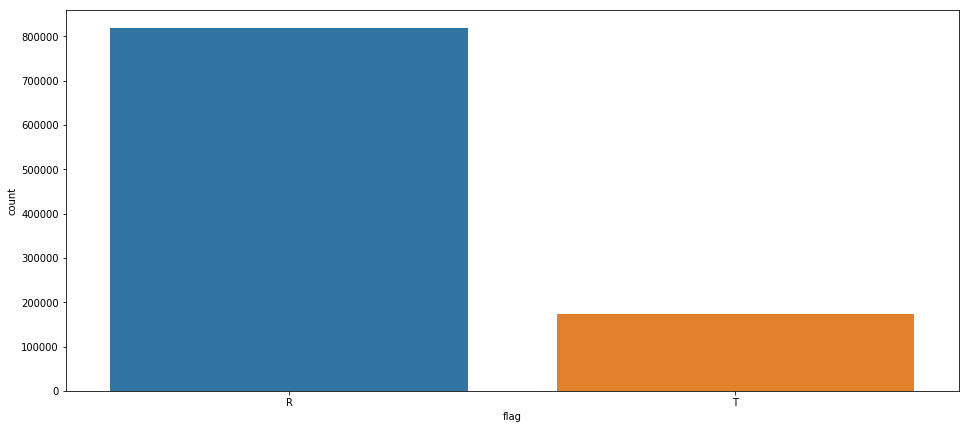

In [5]:
# School Category Factor plot 
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("flag",data=spoofingData)

In [3]:
# convert R and T to 0 and 1
# Map flag fields into bool 
spoofingData['flag'] = spoofingData['flag'].map({'T':1, 'R':0})

In [4]:
spoofingData.head()

,data0,data1,data2,data3,data4,data5,data6,data7,flag
timestamp,,,,,,,,,
2016-11-03 13:13:10.056566,0,0,0,0,16,41,42,36,0
2016-11-03 13:13:10.056817,21,0,0,0,0,0,0,0,0
2016-11-03 13:13:10.057058,5,32,68,104,119,0,0,126,0
2016-11-03 13:13:10.057304,0,32,0,0,0,0,0,0,0
2016-11-03 13:13:10.057542,16,64,96,255,120,196,8,0,0


## Model building

In [5]:
#Create data = x
Cls_X = spoofingData.copy()

#create target = Y
Cls_y = Cls_X.flag

print('X shape before ')
print(Cls_X.shape)

#drop the response column from the x dataset
Cls_X.pop('flag') #drop 'flag'

print('X shape after ')
print(Cls_X.shape)
print('Y shape after ')
print(Cls_y.shape)

X shape before 
(991371, 9)
X shape after 
(991371, 8)
Y shape after 
(991371,)


In [6]:
# Explore distribuion of our class

print("our class distibution")
print(Cls_y.value_counts())

# calculate the percentage of ones
print('Percentage of ones: ', round(Cls_y.mean(),4))

# calculate the percentage of zeros
print('Percentage of Zeros: ',round(1 - Cls_y.mean(),4))

# calculate null accuracy 
print('')
print('##############################')
print('NULL Accuracy: ', max(round(Cls_y.mean(),4), round(1 - Cls_y.mean(),4)))
print('##############################')

our class distibution
0    818164
1    173207
Name: flag, dtype: int64
Percentage of ones:  0.1747
Percentage of Zeros:  0.8253

##############################
NULL Accuracy:  0.8253
##############################


In [10]:
Cls_X.head()

,data0,data1,data2,data3,data4,data5,data6,data7
timestamp,,,,,,,,
2016-11-03 13:13:10.056566,0,0,0,0,16,41,42,36
2016-11-03 13:13:10.056817,21,0,0,0,0,0,0,0
2016-11-03 13:13:10.057058,5,32,68,104,119,0,0,126
2016-11-03 13:13:10.057304,0,32,0,0,0,0,0,0
2016-11-03 13:13:10.057542,16,64,96,255,120,196,8,0


In [11]:
Cls_y.head()

timestamp
2016-11-03 13:13:10.056566    0
2016-11-03 13:13:10.056817    0
2016-11-03 13:13:10.057058    0
2016-11-03 13:13:10.057304    0
2016-11-03 13:13:10.057542    0
Name: flag, dtype: int64

In [8]:
# import ML libraries
#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.ensemble  import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV 

In [9]:
# set seed
seed = 1000
#Split data to  into train and holding set.
X_train,X_test,y_train,y_test = train_test_split(Cls_X, Cls_y, test_size = 0.3, random_state = seed)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(693959, 8)
(693959,)
(297412, 8)
(297412,)


In [10]:
knn = KNeighborsClassifier()

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
knn.score(X_test, y_test)

1.0

In [13]:
X_test.head()

,data0,data1,data2,data3,data4,data5,data6,data7
timestamp,,,,,,,,
2016-11-03 13:21:07.347286,5,33,164,8,33,34,0,112
2016-11-03 13:17:53.676191,21,0,0,0,0,0,0,0
2016-11-03 13:19:13.376566,0,0,0,0,0,0,0,0
2016-11-03 13:14:37.070247,8,0,0,0,0,0,0,0
2016-11-03 13:13:49.907385,1,69,96,255,107,0,0,0


In [17]:
test_data = X_test.iloc[0,:]


In [19]:
type(test_data)

pandas.core.series.Series

In [22]:
knn.predict(X_test.iloc[0:10,:])

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [23]:
test_data = X_test.iloc[0:10,:]

In [24]:
knn.predict(test_data)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [25]:
test_data = test_data + 1

In [26]:
test_data

,data0,data1,data2,data3,data4,data5,data6,data7
timestamp,,,,,,,,
2016-11-03 13:21:07.347286,6,34,165,9,34,35,1,113
2016-11-03 13:17:53.676191,22,1,1,1,1,1,1,1
2016-11-03 13:19:13.376566,1,1,1,1,1,1,1,1
2016-11-03 13:14:37.070247,9,1,1,1,1,1,1,1
2016-11-03 13:13:49.907385,2,70,97,256,108,1,1,1
2016-11-03 13:14:16.234573,1,129,1,1,67,128,5,54
2016-11-03 13:18:17.293499,1,33,1,1,1,1,1,1
2016-11-03 13:15:01.764808,2,70,97,256,108,1,1,1
2016-11-03 13:19:04.673687,22,1,1,1,1,1,1,1


In [27]:
knn.predict(test_data)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [31]:
test_data.data0 = test_data.data0 -26

In [32]:
test_data

,data0,data1,data2,data3,data4,data5,data6,data7
timestamp,,,,,,,,
2016-11-03 13:21:07.347286,5,34,165,9,34,35,1,113
2016-11-03 13:17:53.676191,21,1,1,1,1,1,1,1
2016-11-03 13:19:13.376566,0,1,1,1,1,1,1,1
2016-11-03 13:14:37.070247,8,1,1,1,1,1,1,1
2016-11-03 13:13:49.907385,1,70,97,256,108,1,1,1
2016-11-03 13:14:16.234573,0,129,1,1,67,128,5,54
2016-11-03 13:18:17.293499,0,33,1,1,1,1,1,1
2016-11-03 13:15:01.764808,1,70,97,256,108,1,1,1
2016-11-03 13:19:04.673687,21,1,1,1,1,1,1,1


In [33]:
knn.predict(test_data)

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [15]:
# use a stratified 10-fold cv
Classification_cv = StratifiedKFold(n_splits = 10, random_state = seed)
Classification_cv

StratifiedKFold(n_splits=10, random_state=1000, shuffle=False)

In [ ]:
# KNN
param_grid = {'n_neighbors': np.arange(2, 10),
             'weights':['uniform', 'distance'],
             'metric':['minkowski','euclidean', 'manhattan', 'chebyshev']
             }
knn_test = KNeighborsClassifier() 
knn_test_cv = GridSearchCV(knn_test, param_grid, cv=Classification_cv, scoring = 'roc_auc', verbose=10) 
knn_test_cv.fit(X_train,y_train) 
print(knn_test_cv.best_params_) 
print(knn_test_cv.best_score_)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] metric=minkowski, n_neighbors=2, weights=uniform ................


## EDA

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,1,'canID binning')

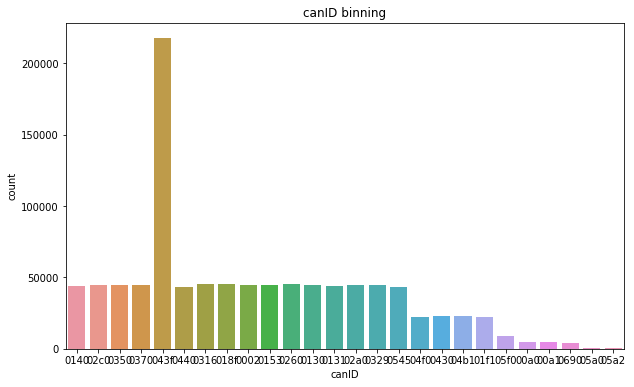

In [61]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="canID", data=df )
plt.title('canID binning')

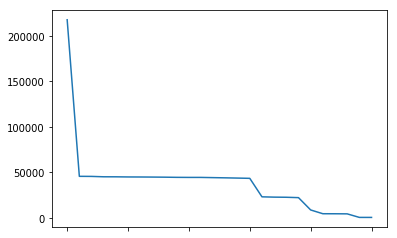

In [54]:
data.canID.value_counts().plot()

In [57]:
data[data.canID == '043f']

,timestamp,canID,dlc,data0,data1,data2,data3,data4,data5,data6,data7,flag
timestamp,,,,,,,,,,,,
2016-11-03 13:13:10.057542,2016-11-03 13:13:10.057542,043f,8,10,40,60,ff,78,c4,08,00,R
2016-11-03 13:13:10.066482,2016-11-03 13:13:10.066482,043f,8,10,40,60,ff,78,c3,08,00,R
2016-11-03 13:13:10.077537,2016-11-03 13:13:10.077537,043f,8,10,40,60,ff,78,c2,08,00,R
2016-11-03 13:13:10.087221,2016-11-03 13:13:10.087221,043f,8,10,40,60,ff,78,c2,08,00,R
2016-11-03 13:13:10.097537,2016-11-03 13:13:10.097537,043f,8,10,40,60,ff,78,c2,08,00,R
2016-11-03 13:13:10.107202,2016-11-03 13:13:10.107202,043f,8,10,40,60,ff,78,c3,08,00,R
2016-11-03 13:13:10.117546,2016-11-03 13:13:10.117546,043f,8,10,40,60,ff,78,c4,08,00,R
2016-11-03 13:13:10.126536,2016-11-03 13:13:10.126536,043f,8,10,40,60,ff,78,c2,08,00,R
2016-11-03 13:13:10.137539,2016-11-03 13:13:10.137539,043f,8,10,40,60,ff,78,c0,08,00,R
